In [20]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%autoreload 2

In [22]:
from utilities import nodo2tree
import shuntingyard as sy
import importlib

In [ ]:
test_expr = "1 + {2 * [(3 + 4 : 2) + 5] * 6} - [7 + (1 + 8) : 3] * [9 : (2)]"

In [30]:
n = sy.parse_expr("1-(3+4)#")
print(n)

Sottrazione: value: 0, children:[Numero: value: 1, children:[], ParentesiTonde: value: 0, children:[Addizione: value: 0, children:[Numero: value: 3, children:[], Numero: value: 4, children:[]]]]


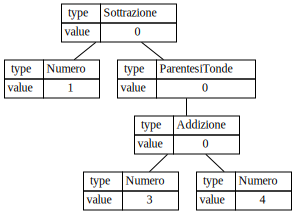

In [31]:
nodo2tree(n)